-----------
Initializing structure...
time for choose_chunkdivision = 0.000842094 s
Working in 2D dimensions.
Computational cell is 3.6 x 3.2 x 0 with resolution 300
     block, center = (0.2,0.4,0)
          size (0.8,0.01,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (0.6,0,0)
          size (0.01,0.8,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 1.02486 s
-----------
Meep: using complex fields.
Meep progress: 0.37333333333333335/10.0 = 3.7% done in 4.0s, 103.4s to go
on time step 224 (time=0.373333), 0.0179003 s/step
Meep progress: 0.76/10.0 = 7.6% done in 8.0s, 97.5s to go
on time step 456 (time=0.76), 0.0172944 s/step
Meep progress: 1.095/10.0 = 10.9% done in 12.0s, 97.8s to go
on time step 657 (time=1.095), 0.0199038 s/step
Meep progress: 1.4416666666666667/10.0 = 14.4% done in 16.0s, 95.1s to go
on

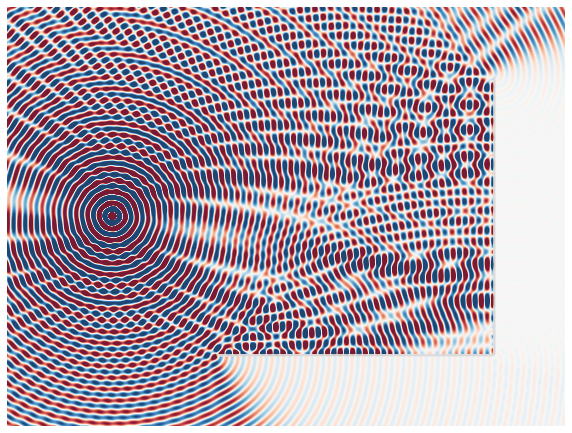

In [35]:
import meep as mp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

fcen = 30

dpml = 1
dpml_v = mp.Vector3(dpml, dpml)
pml_layers = [mp.PML(dpml)]

cell_size = mp.Vector3(1.6, 1.2) + 2*dpml_v
nonpml_vol = mp.Volume(mp.Vector3(), size=cell_size - 2*dpml_v)

geometry = [
    mp.Block(size=mp.Vector3(0.80, 0.01), material=mp.metal).shift(mp.Vector3(0.2, 0.4)),
    mp.Block(size=mp.Vector3(0.01, 0.80), material=mp.metal).shift(mp.Vector3(0.6, 0.0))
]
#geometry = []

src = [mp.Source(mp.ContinuousSource(fcen),
                 component=mp.Hz,
                 center=mp.Vector3(-0.5, 0))]

sim = mp.Simulation(cell_size=cell_size,
                    geometry=geometry,
                    sources=src,
                    resolution=300,
                    force_complex_fields=True,
                    boundary_layers=pml_layers)

sim.init_sim()
sim.run(until=10)

eps_data = sim.get_array(vol=nonpml_vol, component=mp.Dielectric)
ez_data = sim.get_array(vol=nonpml_vol, component=mp.Hz)

ez_data = np.real(ez_data)# - plane_wave)

plt.figure(figsize=(10, 10))
plt.imshow(-eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', vmin=-4, vmax=+4, alpha=0.9)
plt.axis('off')
plt.show()

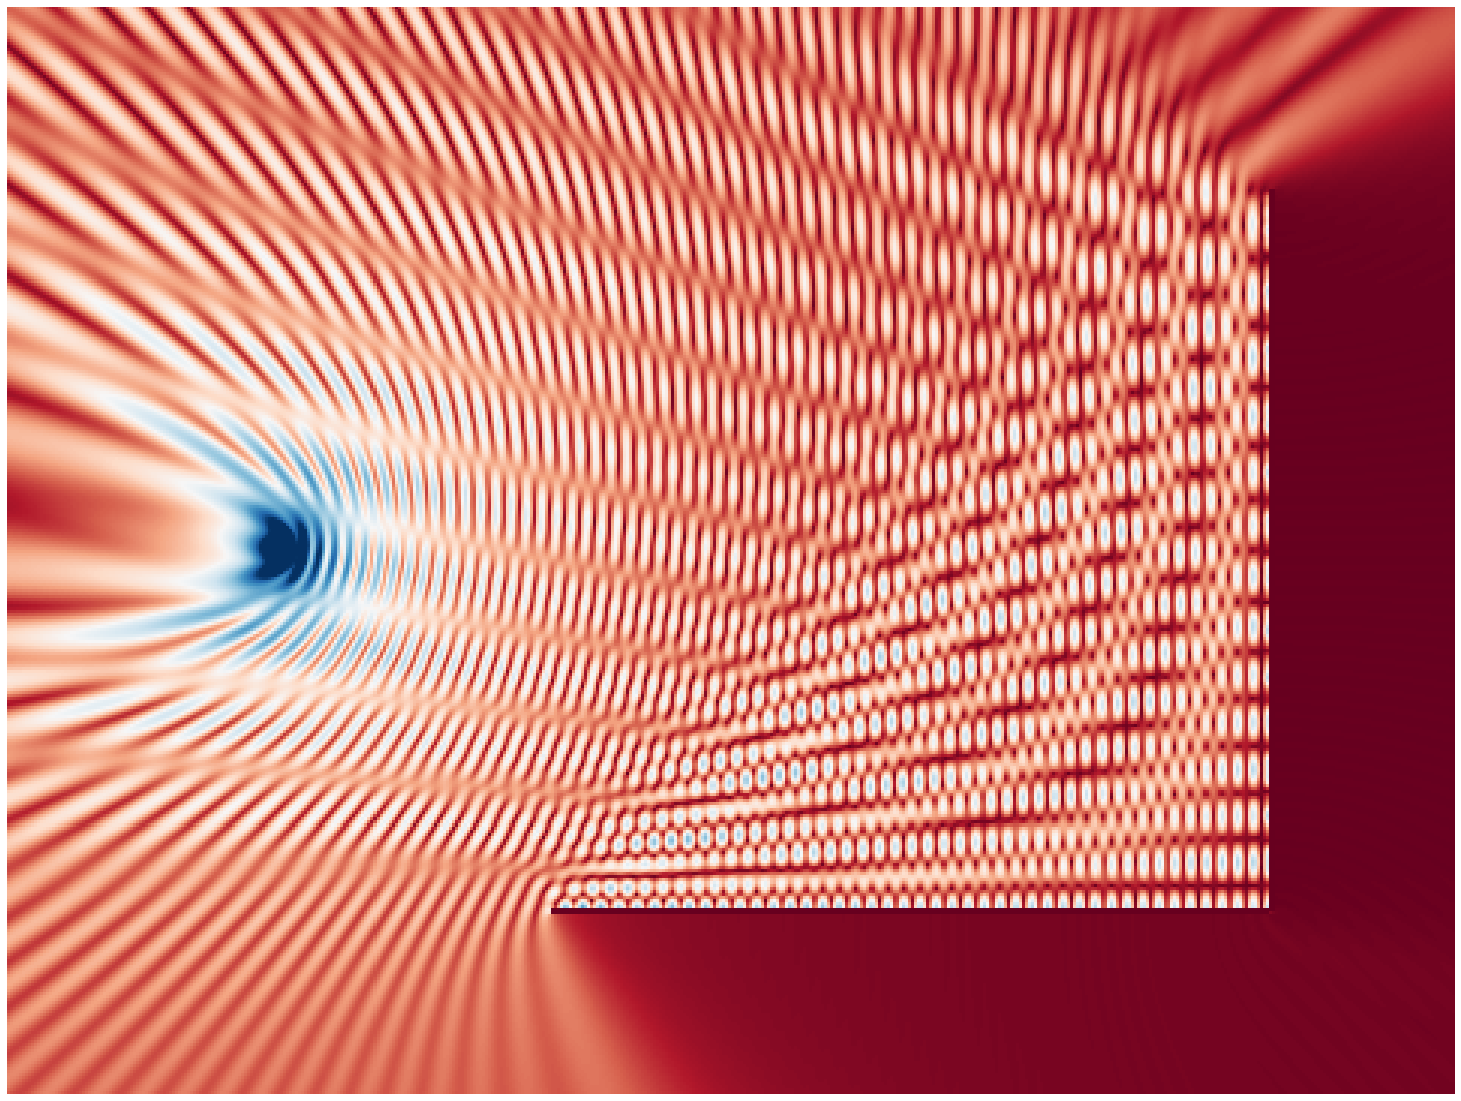

In [39]:
eps_data = sim.get_array(vol=nonpml_vol, component=mp.Dielectric)
ez_data = sim.get_array(vol=nonpml_vol, component=mp.Hz)

#ez_data = np.real(ez_data - background)
#ez_data = np.real(background)

#ez_data = np.real(background)
#ez_data = ez_data - background
#ez_data = np.real(ez_data)

#ez_data = np.real(ez_data)
ez_data = np.abs(ez_data)/2-4

plt.figure(figsize=(30, 20))
plt.imshow(ez_data.transpose(), cmap='RdBu', vmin=-4, vmax=+4)
plt.imshow(-eps_data.transpose(), cmap='binary', alpha=0)
plt.axis('off')
plt.show()

In [31]:
#background = sim.get_array(vol=nonpml_vol, component=mp.Hz)

(90, 181) (482, 362)


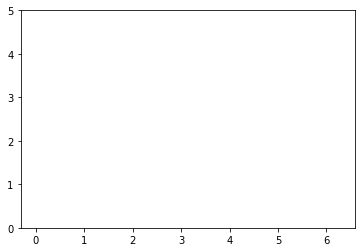

In [29]:
ez_data = np.abs(background)
idx = np.unravel_index(np.argmax(ez_data, axis=None), ez_data.shape)
print(idx, ez_data.shape)

r = 15
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t) * r + idx[0]
y = np.sin(t) * r + idx[1]

v = ez_data[x.astype(int),y.astype(int)]

plt.figure()
plt.plot(t, v)
plt.axhline(np.mean(v))
plt.ylim(0, 5)
plt.show()